In [3]:
!pip install pandas==1.0.3

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Import the feature data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

In [5]:
kevin = pd.read_csv(root_folder+"kevin-zhu/dev-extracted.csv")
kevin_train_X = kevin.drop(['line_id','upgrade'],axis=1)
kevin_train_y = kevin['upgrade']

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,train_test_split

# Hyperparameters tunning of GradientBoostingClassifier(GBM)

In [11]:
param_test1 = {'n_estimators':range(691,1000,30)}
CV_boost1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = 0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=-4, cv=5,verbose=2)
CV_boost1.fit(kevin_train_X,kevin_train_y)


Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] n_estimators=691 ................................................


[Parallel(n_jobs=-4)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. n_estimators=691, total=  51.4s
[CV] n_estimators=691 ................................................


[Parallel(n_jobs=-4)]: Done   1 out of   1 | elapsed:   51.4s remaining:    0.0s


[CV] ................................. n_estimators=691, total=  51.3s
[CV] n_estimators=691 ................................................
[CV] ................................. n_estimators=691, total=  50.8s
[CV] n_estimators=691 ................................................
[CV] ................................. n_estimators=691, total=  51.7s
[CV] n_estimators=691 ................................................
[CV] ................................. n_estimators=691, total=  51.6s
[CV] n_estimators=721 ................................................
[CV] ................................. n_estimators=721, total=  53.3s
[CV] n_estimators=721 ................................................
[CV] ................................. n_estimators=721, total=  53.9s
[CV] n_estimators=721 ................................................
[CV] ................................. n_estimators=721, total=  53.8s
[CV] n_estimators=721 ................................................
[CV] .

[Parallel(n_jobs=-4)]: Done  55 out of  55 | elapsed: 57.8min finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-4, param_grid={'n_estimators': range(691, 1000, 30)},
             scoring='f1', verbose=2)

In [12]:
CV_boost1.best_score_

0.8933924852860085

In [13]:
boost_result = pd.DataFrame(CV_boost1.cv_results_)
boost_result = boost_result.sort_values(by = ['rank_test_score'])
boost_result.iloc[0]['params']

{'n_estimators': 961}

In [13]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
CV_boost2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=961,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='f1',n_jobs=-4, cv=5,verbose=2)
CV_boost2.fit(kevin_train_X,kevin_train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=5, min_samples_split=200 ..............................


[Parallel(n_jobs=-4)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... max_depth=5, min_samples_split=200, total=  49.0s
[CV] max_depth=5, min_samples_split=200 ..............................


[Parallel(n_jobs=-4)]: Done   1 out of   1 | elapsed:   49.0s remaining:    0.0s


[CV] ............... max_depth=5, min_samples_split=200, total=  48.8s
[CV] max_depth=5, min_samples_split=200 ..............................
[CV] ............... max_depth=5, min_samples_split=200, total=  48.3s
[CV] max_depth=5, min_samples_split=200 ..............................
[CV] ............... max_depth=5, min_samples_split=200, total=  50.8s
[CV] max_depth=5, min_samples_split=200 ..............................
[CV] ............... max_depth=5, min_samples_split=200, total=  49.2s
[CV] max_depth=5, min_samples_split=400 ..............................
[CV] ............... max_depth=5, min_samples_split=400, total=  48.7s
[CV] max_depth=5, min_samples_split=400 ..............................
[CV] ............... max_depth=5, min_samples_split=400, total=  48.9s
[CV] max_depth=5, min_samples_split=400 ..............................
[CV] ............... max_depth=5, min_samples_split=400, total=  48.5s
[CV] max_depth=5, min_samples_split=400 ..............................
[CV] .

[Parallel(n_jobs=-4)]: Done 150 out of 150 | elapsed: 214.9min finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=961,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='f1', verbose=2)

In [15]:
CV_boost2.best_score_

0.8967699965779111

In [17]:
boost_result = pd.DataFrame(CV_boost2.cv_results_)
boost_result = boost_result.sort_values(by = ['rank_test_score'])
boost_result.iloc[0]['params']

{'max_depth': 13, 'min_samples_split': 600}

In [82]:
param_test3 = {'min_samples_leaf':range(30,81,10)}
CV_boost3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                                n_estimators=961,
                                                                min_samples_split=600,
                                                                max_depth=13,
                                                                max_features='sqrt', 
                                                                subsample=0.8, 
                                                                random_state=10), 
                       param_grid = param_test3, scoring='f1',n_jobs=-4, cv=3,verbose=2)
CV_boost3.fit(train_feature,kevin_train_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] min_samples_leaf=30 .............................................


[Parallel(n_jobs=-4)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. min_samples_leaf=30, total= 1.4min
[CV] min_samples_leaf=30 .............................................


[Parallel(n_jobs=-4)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] .............................. min_samples_leaf=30, total= 1.4min
[CV] min_samples_leaf=30 .............................................
[CV] .............................. min_samples_leaf=30, total= 1.4min
[CV] min_samples_leaf=40 .............................................
[CV] .............................. min_samples_leaf=40, total= 1.4min
[CV] min_samples_leaf=40 .............................................
[CV] .............................. min_samples_leaf=40, total= 1.4min
[CV] min_samples_leaf=40 .............................................
[CV] .............................. min_samples_leaf=40, total= 1.9min
[CV] min_samples_leaf=50 .............................................
[CV] .............................. min_samples_leaf=50, total= 2.0min
[CV] min_samples_leaf=50 .............................................
[CV] .............................. min_samples_leaf=50, total= 1.9min
[CV] min_samples_leaf=50 .............................................
[CV] .

[Parallel(n_jobs=-4)]: Done  18 out of  18 | elapsed: 33.4min finished


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=13,
                                                  max_features='sqrt',
                                                  min_samples_split=600,
                                                  n_estimators=961,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-4, param_grid={'min_samples_leaf': range(30, 81, 10)},
             scoring='f1', verbose=2)

In [83]:
CV_boost3.best_score_

0.8838203255207122

In [84]:
boost_result3 = pd.DataFrame(CV_boost3.cv_results_)
boost_result3 = boost_result3.sort_values(by = ['rank_test_score'])
boost_result3.iloc[0]['params']

{'min_samples_leaf': 80}

# Final F1 score of GBM after para tuning

In [53]:
X_train,X_test,y_train,y_test = train_test_split(kevin_train_X,kevin_train_y,train_size=0.8)
optimaize = GradientBoostingClassifier(learning_rate=0.1,
                                       n_estimators=961,
                                       min_samples_split=600,
                                       min_samples_leaf=80,
                                       max_depth=13,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)
optimaize.fit(X_train,y_train)
pred = optimaize.predict(X_test)
f1_score = metrics.f1_score(y_test,pred)
f1_score

0.8938637461749074

# Find the most important features in GBM

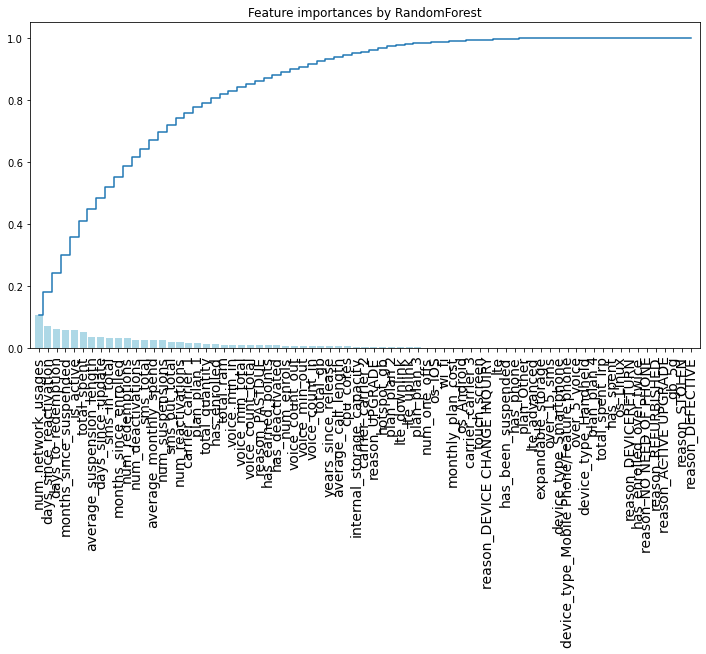

In [25]:
importances = optimaize.feature_importances_
feat_names = kevin_train_X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [28]:
indices[0]

65

In [29]:
feat_names[65]

'num_network_usages'

In [30]:
top_features = []
for i in range(30):
    top_features.append(feat_names[indices[i]])
top_features

['num_network_usages',
 'days_since_reactivation',
 'days_to_redemption',
 'months_since_suspended',
 'is_active',
 'total_spent',
 'average_suspension_length',
 'days_since_update',
 'sms_in_total',
 'months_since_enrolled',
 'num_redemptions',
 'num_deactivations',
 'sms_total',
 'average_monthly_spend',
 'num_suspensions',
 'sms_out_total',
 'num_reactivations',
 'carrier_carrier 1',
 'plan_plan 1',
 'total_quantity',
 'has_enrolled',
 'total_ram',
 'voice_min_in',
 'voice_min_total',
 'voice_count_total',
 'reason_PASTDUE',
 'has_earned_points',
 'has_deactivated',
 'num_enrols',
 'voice_count_out']

In [34]:
train_feature = kevin_train_X[top_features]

# Check the performance of XGBoost

In [90]:
!pip install xgboost
from xgboost import XGBClassifier

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [91]:
X_train,X_test,y_train,y_test = train_test_split(kevin_train_X,kevin_train_y,train_size=0.8)
clf3 = XGBClassifier()
clf3.fit(X_train,y_train)
pred = clf3.predict(X_test)
f1_score = metrics.f1_score(y_test,pred)
f1_score

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:43:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.883915633553373

In [109]:
clf3.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [110]:
from sklearn.metrics import average_precision_score
print(average_precision_score(,pred))

<function average_precision_score at 0x7f5b54669710> [0 1 0 ... 0 0 0]


# Hyperparameters tunning of LightGBM

In [54]:
! pip install lightgbm

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [61]:
import lightgbm as lgb

lg = lgb.LGBMClassifier(random_state=11,silent=False)
param_dist = {"max_bin":[63,255],
              "max_depth": [20,40,50],
              "num_iterations" :[100,200,500],
              "learning_rate" : [0.05,0.1],
              "num_leaves": [100,150,200]
             }

grid_search = GridSearchCV(lg, n_jobs=-4, param_grid=param_dist, cv = 3, scoring="f1", verbose=1)
grid_search.fit(kevin_train_X,kevin_train_y)
print(grid_search.best_params_,grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10116, number of negative: 27129
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 37245, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271607 -> initscore=-0.986485
[LightGBM] [Info] Start training from score -0.986485


[Parallel(n_jobs=-4)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10116, number of negative: 27129
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1871
[LightGBM] [Info] Number of data points in the train set: 37245, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271607 -> initscore=-0.986485
[LightGBM] [Info] Start training from score -0.986485
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10116, number of negative: 27130
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `f

[Parallel(n_jobs=-4)]: Done 324 out of 324 | elapsed: 89.1min finished


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 15174, number of negative: 40694
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5931
[LightGBM] [Info] Number of data points in the train set: 55868, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271604 -> initscore=-0.986497
[LightGBM] [Info] Start training from score -0.986497
{'learning_rate': 0.1, 'max_bin': 255, 'max_depth': 40, 'num_iterations': 500, 'num_leaves': 150} 0.8931536047738414


In [62]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_bin': 255,
 'max_depth': 40,
 'num_iterations': 500,
 'num_leaves': 150}

In [65]:
grid_search.best_score_

0.8931536047738414

In [87]:
X_train,X_test,y_train,y_test = train_test_split(kevin_train_X,kevin_train_y,train_size=0.8)
lg = lgb.LGBMClassifier(learning_rate=0.1,
                        n_estimators=700,
                        max_bin = 255,
                        max_depth=40, 
                        num_iterations =850, 
                        random_state=11,
                        num_leaves = 150,
                        silent=False)

lg.fit(X_train,y_train)
pred = lg.predict(X_test)
f1_score = metrics.f1_score(y_test,pred)
f1_score

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12140, number of negative: 32554
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.162103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5917
[LightGBM] [Info] Number of data points in the train set: 44694, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271625 -> initscore=-0.986394
[LightGBM] [Info] Start training from score -0.986394


0.9023195034302516

# Final F1 score of LightBGM after para tuning

In [94]:
X_train,X_test,y_train,y_test = train_test_split(kevin_train_X,kevin_train_y,train_size=0.8,random_state=2)
lg = lgb.LGBMClassifier(learning_rate=0.1,
                        n_estimators=400,
                        max_bin=255,
                        max_depth=40, 
                        num_iterations=850, 
                        random_state=11,
                        num_leaves = 150,
                        silent=False)

lg.fit(X_train,y_train)
pred = lg.predict(X_test)
f1_score = metrics.f1_score(y_test,pred)
f1_score

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12200, number of negative: 32494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.402600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5916
[LightGBM] [Info] Number of data points in the train set: 44694, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272967 -> initscore=-0.979620
[LightGBM] [Info] Start training from score -0.979620


0.9025825433148087

# Check the overfitting issue and decide the final hyperparameters

In [98]:
X_train,X_test,y_train,y_test = train_test_split(kevin_train_X,kevin_train_y,train_size=0.8,random_state=2)
lg = lgb.LGBMClassifier(learning_rate=0.1,
                        n_estimators=400,
                        max_bin=255,
                        max_depth=40, 
                        num_iterations=250, 
                        random_state=11,
                        num_leaves = 150,
                        silent=False)

lg.fit(X_train,y_train, eval_set=(X_test,y_test))
pred = lg.predict(X_test)
f1_score = metrics.f1_score(y_test,pred)
f1_score

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12200, number of negative: 32494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5916
[LightGBM] [Info] Number of data points in the train set: 44694, number of used features: 69
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272967 -> initscore=-0.979620
[LightGBM] [Info] Start training from score -0.979620
[1]	valid_0's binary_logloss: 0.516577
[2]	valid_0's binary_logloss: 0.467335
[3]	valid_0's binary_logloss: 0.42784
[4]	valid_0's binary_logloss: 0.395623
[5]	valid_0's binary_logloss: 0.3688
[6]	valid_0's binary_logloss: 0.345681
[7]	valid_0's binary_logloss: 0.325841
[8]	valid

0.9000979431929481

In [103]:
X_train,X_test,y_train,y_test = train_test_split(kevin_train_X,kevin_train_y,train_size=0.8,random_state=2)
lg = lgb.LGBMClassifier(learning_rate=0.1,
                        n_estimators=400,
                        max_bin=255,
                        max_depth=40, 
                        num_iterations=200, 
                        random_state=11,
                        num_leaves = 150,
                        silent=False)

lg.fit(X_train,y_train, eval_set=(X_test,y_test))
pred = lg.predict(X_test)
f1_score = metrics.f1_score(y_test,pred)
f1_score

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12200, number of negative: 32494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5916
[LightGBM] [Info] Number of data points in the train set: 44694, number of used features: 69
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272967 -> initscore=-0.979620
[LightGBM] [Info] Start training from score -0.979620
[1]	valid_0's binary_logloss: 0.516577
[2]	valid_0's binary_logloss: 0.467335
[3]	valid_0's binary_logloss: 0.42784
[4]	valid_0's binary_logloss: 0.395623
[5]	valid_0's binary_logloss: 0.3688
[6]	valid_0's binary_logloss: 0.345681
[7]	valid_0's binary_logloss: 0.325841
[8]	valid

0.900147082856676

In [105]:
X_train,X_test,y_train,y_test = train_test_split(kevin_train_X,kevin_train_y,train_size=0.8,random_state=2)
lg = lgb.LGBMClassifier(learning_rate=0.1,
                        n_estimators=400,
                        max_bin=255,
                        max_depth=40, 
                        num_iterations=500, 
                        random_state=11,
                        num_leaves = 150,
                        silent=False)

lg.fit(X_train,y_train, eval_set=(X_test,y_test))
pred = lg.predict(X_test)
f1_score = metrics.f1_score(y_test,pred)
f1_score

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12200, number of negative: 32494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5916
[LightGBM] [Info] Number of data points in the train set: 44694, number of used features: 69
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272967 -> initscore=-0.979620
[LightGBM] [Info] Start training from score -0.979620
[1]	valid_0's binary_logloss: 0.516577
[2]	valid_0's binary_logloss: 0.467335
[3]	valid_0's binary_logloss: 0.42784
[4]	valid_0's binary_logloss: 0.395623
[5]	valid_0's binary_logloss: 0.3688
[6]	valid_0's binary_logloss: 0.345681
[7]	valid_0's binary_logloss: 0.325841
[8]	valid

0.9011599411860806

In [106]:
lg

LGBMClassifier(max_bin=255, max_depth=40, n_estimators=400, num_iterations=500,
               num_leaves=150, random_state=11, silent=False)